# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

*Business Framing*: Identify key drivers for used car prices.

*Data Problem Definition*:  Given a dataset containing attributes of used cars (e.g., manufacturer, model, mileage, year, condition) and their corresponding selling prices, our task is to:

- Explore and quantify the relationships between these attributes and the selling price.
- Identify and rank the most significant factors that influence the price variation.
- Develop a predictive model to estimate the selling price based on these key factors.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orig_df = pd.read_csv("data/vehicles.csv")

In [3]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
orig_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
orig_df.describe(include="all")

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
orig_df.agg(["unique"]).T

,unique
id,"[7222695916, 7218891961, 7221797935, 722227076..."
region,"[prescott, fayetteville, florida keys, worcest..."
price,"[6000, 11900, 21000, 1500, 4900, 1600, 1000, 1..."
year,"[nan, 2014.0, 2010.0, 2020.0, 2017.0, 2013.0, ..."
manufacturer,"[nan, gmc, chevrolet, toyota, ford, jeep, niss..."
model,"[nan, sierra 1500 crew cab slt, silverado 1500..."
condition,"[nan, good, excellent, fair, like new, new, sa..."
cylinders,"[nan, 8 cylinders, 6 cylinders, 4 cylinders, 5..."
fuel,"[nan, gas, other, diesel, hybrid, electric]"
odometer,"[nan, 57923.0, 71229.0, 19160.0, 41124.0, 1280..."


<Axes: >

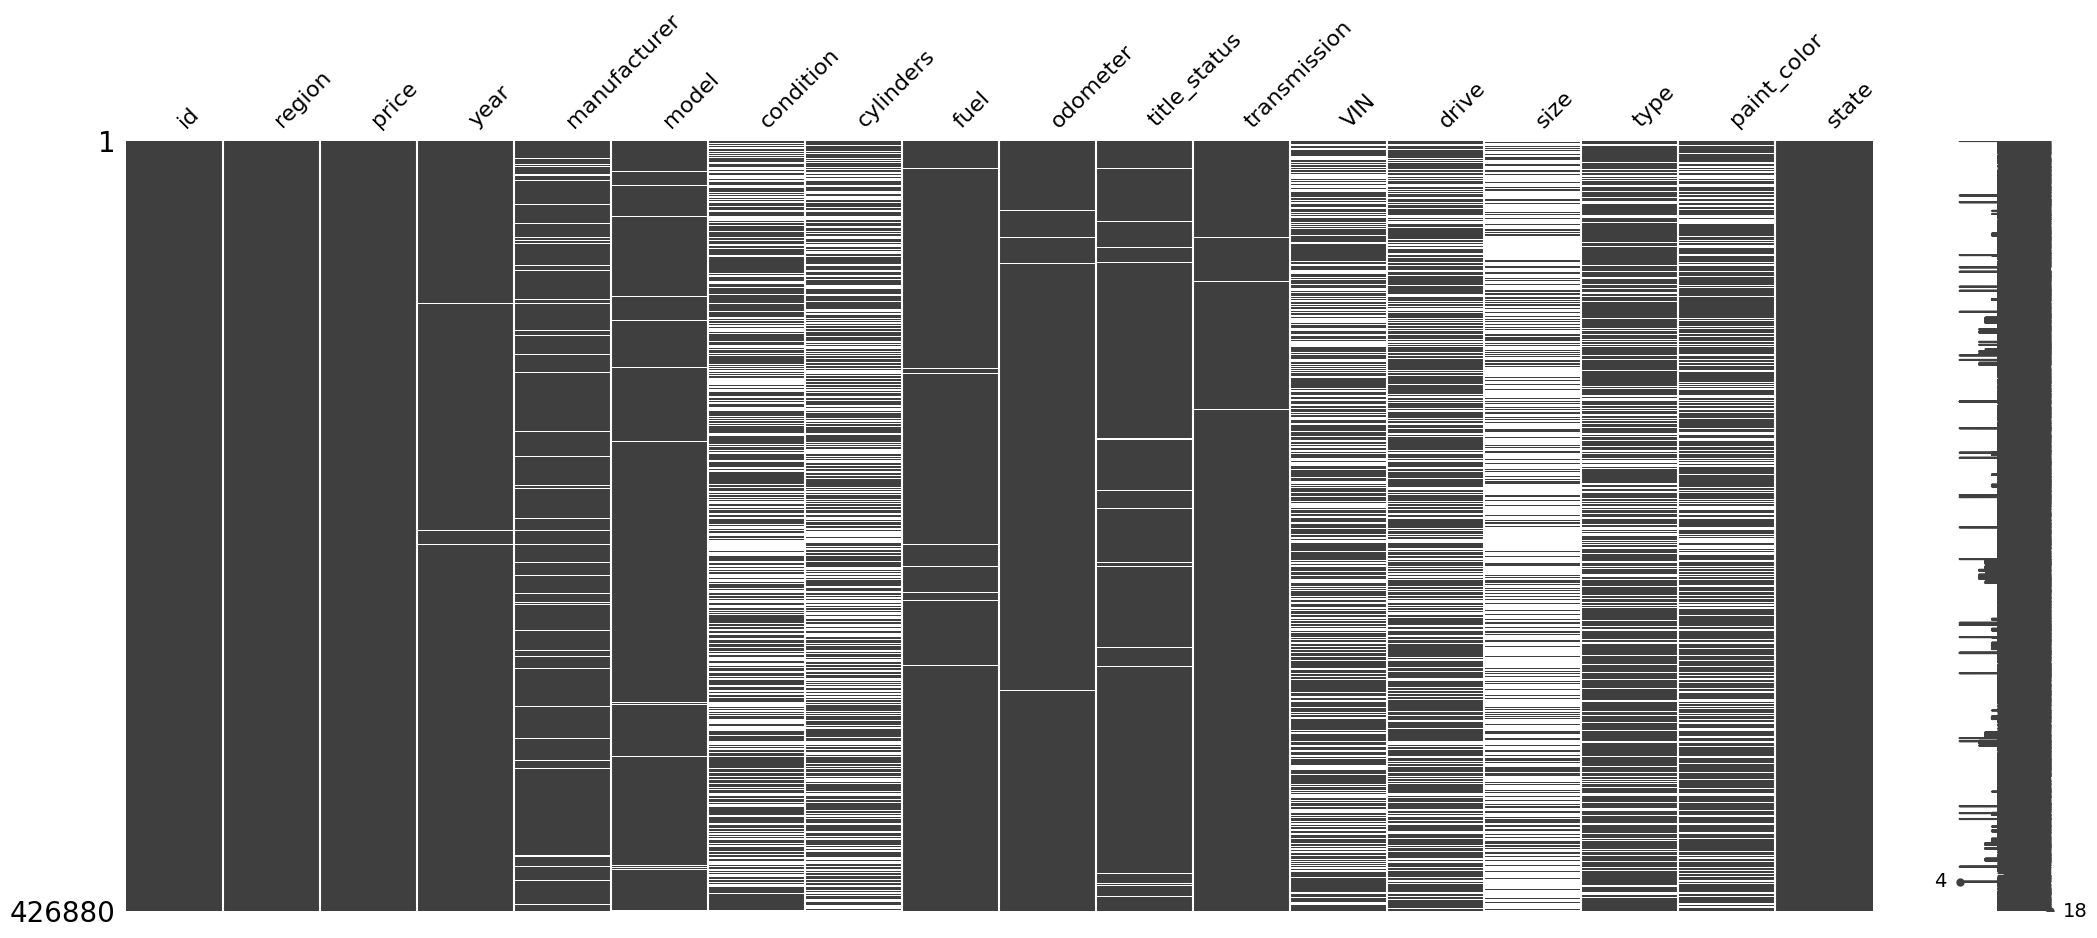

In [7]:
msno.matrix(orig_df)

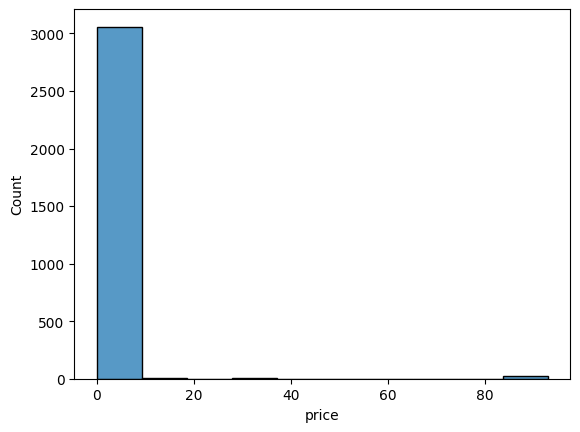

In [8]:
sns.histplot(orig_df.dropna()[orig_df.dropna().price < 100], bins=10, x="price")
plt.show()

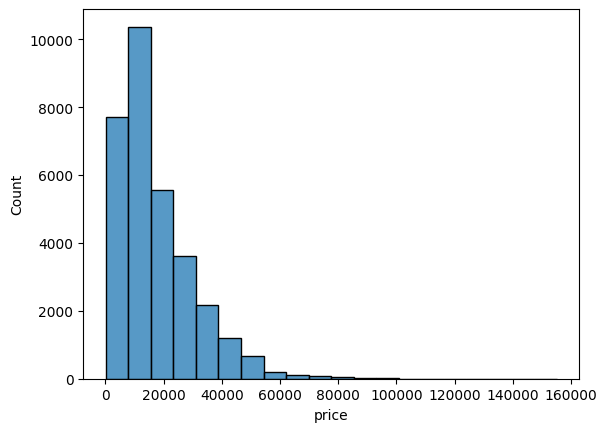

In [9]:
sns.histplot(orig_df.dropna()[orig_df.dropna().price >= 100], bins=20, x="price")
plt.show()

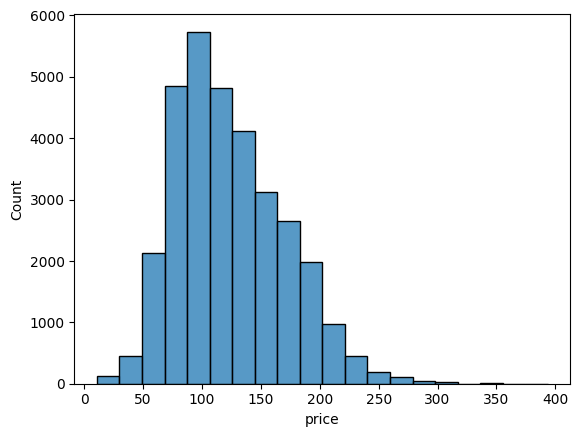

In [10]:
sns.histplot(
    orig_df.dropna()[orig_df.dropna().price >= 100].price.apply(lambda x: np.sqrt(x)),
    bins=20,
)
plt.show()

In [11]:
pd.cut(orig_df.price[orig_df.price > 0], bins=4).value_counts()

price
(-3736927.71, 934232178.5]      393974
(934232178.5, 1868464356.0]          6
(2802696533.5, 3736928711.0]         5
(1868464356.0, 2802696533.5]         0
Name: count, dtype: int64

In [12]:
pd.cut(
    orig_df.price[(orig_df.price > 100) & (orig_df.price < 1e5)], bins=4
).value_counts()

price
(1.102, 25075.5]      276987
(25075.5, 50050.0]    100568
(50050.0, 75024.5]     10639
(75024.5, 99999.0]      1600
Name: count, dtype: int64

<class 'pandas.core.series.Series'>
Index: 389794 entries, 0 to 426879
Series name: price
Non-Null Count   Dtype  
--------------   -----  
389794 non-null  float64
dtypes: float64(1)
memory usage: 5.9 MB


None

<Axes: >

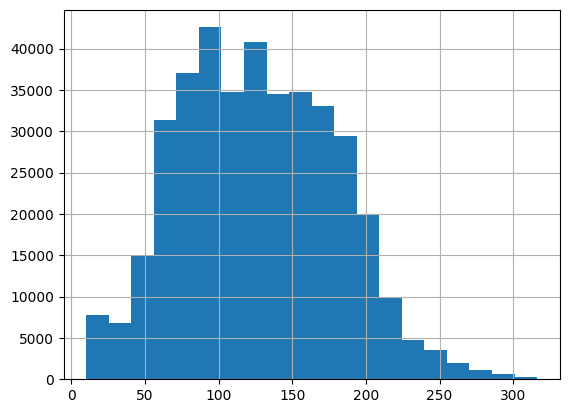

In [13]:
test = orig_df.price[(orig_df.price > 100) & (orig_df.price < 100000)].apply(
    lambda x: np.sqrt(x)
)

display(test.info())
test.hist(bins=20)

odometer
(-499.232, 124808.0]    273765
(124808.0, 249616.0]    110173
(249616.0, 374424.0]      5320
(374424.0, 499232.0]       493
Name: count, dtype: int64

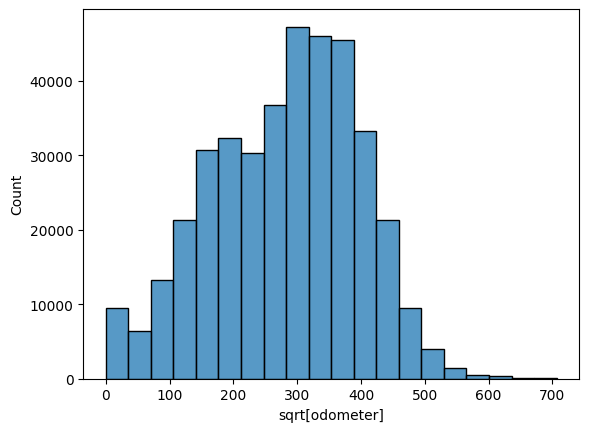

In [14]:
test = (
    orig_df[(orig_df.price > 0) & (orig_df.price < 100000)]
    .dropna(subset=["odometer"])
    .copy()
)

display(pd.cut(test.odometer[test.odometer < 0.5e6], 4).value_counts(sort=False))

sns.histplot(test[test.odometer < 0.5e6].odometer.apply(np.sqrt), bins=20)
plt.xlabel("sqrt[odometer]")
plt.show()

In [15]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [16]:
df = orig_df.copy()

df = df.drop(["id", "VIN"], axis=1)

df["model"] = df["model"].astype(str)
car_types = set(df["type"].dropna().unique())
for i, v in enumerate(df.model.apply(lambda x: x.split())):
    if pd.isna(df.loc[i, "type"]):
        intersection = list(set(v).intersection(car_types))
        if len(intersection) > 0:
            df.loc[i, "type"] = intersection[0]

df = df.dropna(
    subset=[
        "year",
        "model",
        "fuel",
        "odometer",
        "title_status",
        "transmission",
        "manufacturer",
        "type",
        "condition",
    ]
)

df = df.drop(["model", "size", "region", "state", "paint_color"], axis=1)

df["year"] = df["year"].astype(int)
df["price"] = df["price"].astype(float)

df = df[(df.price >= 100) & (df.price <= 0.1e6)]
df = df[(df.odometer > 0) & (df.odometer <= 0.5e6)]

df = df[df.year > 1950]

df["age"] = df.year.max() - df["year"]
df = df.drop(["year"], axis=1)

# df = df.fillna("unknown")
df = df.dropna().reset_index(drop=True)

In [17]:
df["odometer.sqrt"] = np.sqrt(df["odometer"])
df["price.sqrt"] = np.sqrt(df["price"])

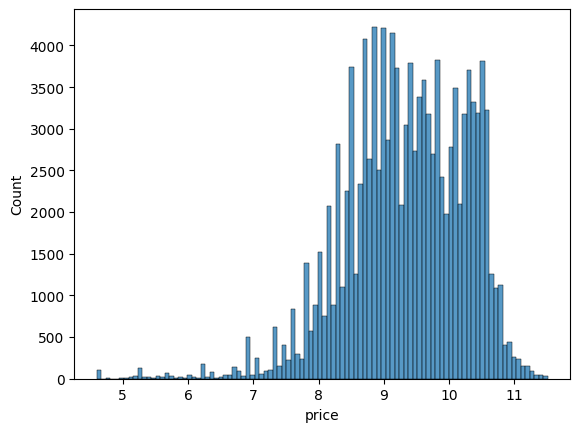

In [18]:
sns.histplot(df.price.apply(np.log), bins=100)
plt.show()

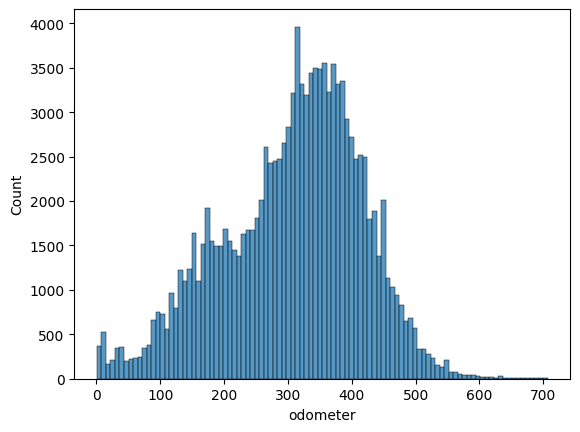

In [19]:
sns.histplot(df.odometer.apply(np.sqrt), bins=100)
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121930 entries, 0 to 121929
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          121930 non-null  float64
 1   manufacturer   121930 non-null  object 
 2   condition      121930 non-null  object 
 3   cylinders      121930 non-null  object 
 4   fuel           121930 non-null  object 
 5   odometer       121930 non-null  float64
 6   title_status   121930 non-null  object 
 7   transmission   121930 non-null  object 
 8   drive          121930 non-null  object 
 9   type           121930 non-null  object 
 10  age            121930 non-null  int64  
 11  odometer.sqrt  121930 non-null  float64
 12  price.sqrt     121930 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 12.1+ MB


In [21]:
for i in df.select_dtypes(include=object).columns:
    print(i, len(df[i].unique()), df[i].unique())

manufacturer 42 ['ford' 'gmc' 'chevrolet' 'toyota' 'jeep' 'nissan' 'honda' 'dodge'
 'chrysler' 'ram' 'mercedes-benz' 'infiniti' 'bmw' 'volkswagen' 'mazda'
 'porsche' 'lexus' 'rover' 'ferrari' 'audi' 'mitsubishi' 'kia' 'hyundai'
 'fiat' 'acura' 'cadillac' 'lincoln' 'jaguar' 'mini' 'saturn' 'volvo'
 'alfa-romeo' 'buick' 'subaru' 'pontiac' 'tesla' 'harley-davidson'
 'mercury' 'datsun' 'aston-martin' 'land rover' 'morgan']
condition 6 ['excellent' 'good' 'new' 'fair' 'like new' 'salvage']
cylinders 8 ['6 cylinders' '8 cylinders' '4 cylinders' '5 cylinders' '10 cylinders'
 '3 cylinders' 'other' '12 cylinders']
fuel 5 ['gas' 'diesel' 'other' 'hybrid' 'electric']
title_status 6 ['clean' 'rebuilt' 'salvage' 'missing' 'lien' 'parts only']
transmission 3 ['automatic' 'other' 'manual']
drive 3 ['rwd' '4wd' 'fwd']
type 13 ['truck' 'pickup' 'other' 'coupe' 'mini-van' 'SUV' 'sedan' 'offroad'
 'convertible' 'hatchback' 'wagon' 'van' 'bus']


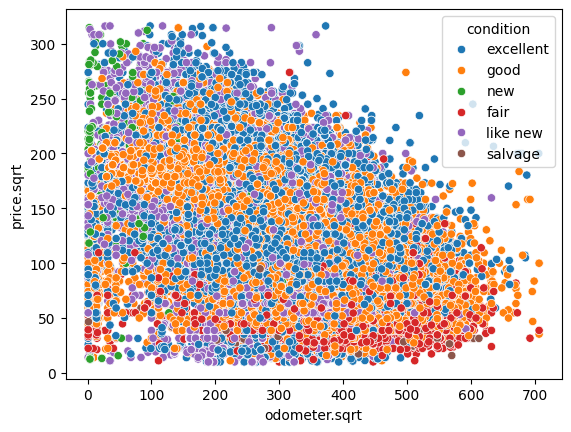

In [22]:
sns.scatterplot(df, x="odometer.sqrt", y="price.sqrt", hue="condition")
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

preX = df.drop([x for x in df.columns if x.startswith("price")], axis=1)
y = df["price"]

ohe_columns = [
    x for x in preX.select_dtypes(include=object).columns if x != "condition"
]

preprocessor = make_column_transformer(
    (StandardScaler(), preX.select_dtypes(include=[int, float]).columns),
    (OneHotEncoder(drop="if_binary", sparse_output=False), ohe_columns),
    (
        OrdinalEncoder(
            categories=[["salvage", "fair", "good", "excellent", "like new", "new"]]
        ),
        ["condition"],
    ),
    remainder="drop",
    verbose_feature_names_out=False,
).set_output(transform="pandas")

X = preprocessor.fit_transform(preX)

In [24]:
X.head()

,odometer,age,odometer.sqrt,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,condition
0,0.338157,-0.381906,0.463064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
1,-0.586086,-0.269483,-0.413420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,-1.196964,-0.719174,-1.241117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,-0.986553,-1.056442,-0.914865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
4,-1.387052,-0.719174,-1.609548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [25]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split, GridSearchCV

In [26]:
X[preprocessor.transformers_[0][2]]

,odometer,age,odometer.sqrt
0,0.338157,-0.381906,0.463064
1,-0.586086,-0.269483,-0.413420
2,-1.196964,-0.719174,-1.241117
3,-0.986553,-1.056442,-0.914865
4,-1.387052,-0.719174,-1.609548
...,...,...,...
121925,-1.007375,-0.831596,-0.944611
121926,-0.789997,-0.719174,-0.654155
121927,-1.176470,-0.944019,-1.206428
121928,-1.154464,-1.056442,-1.169995


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [28]:
from sklearn.compose import TransformedTargetRegressor

gridcv = GridSearchCV(
    estimator=TransformedTargetRegressor(
        regressor=Ridge(max_iter=2000), func=np.log1p, inverse_func=np.expm1
    ),
    param_grid={
        "regressor__alpha": 10.0 ** np.array([-2, -1, 0, 1]),
        "regressor__fit_intercept": [False, True],
    },
    scoring="neg_root_mean_squared_error",
    cv=4,
    n_jobs=-1,
).fit(X_train, y_train)

In [29]:
print(f"Best params: {gridcv.best_params_}")
print(f"Train score: {gridcv.score(X_train, y_train)}")
print(f"Test score: {gridcv.score(X_test, y_test)}")

Best params: {'regressor__alpha': 1.0, 'regressor__fit_intercept': True}
Train score: -7200.6174407028075
Test score: -7292.979032166852


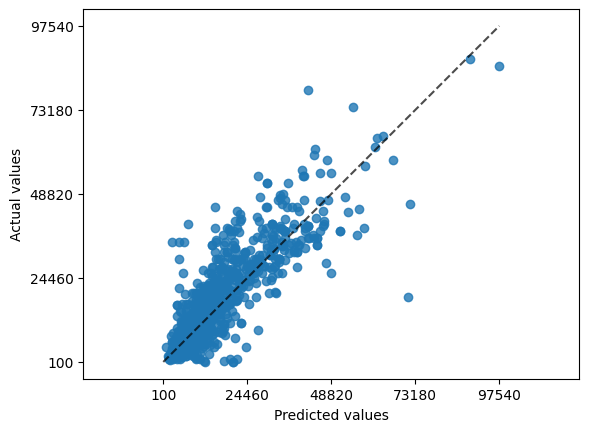

In [30]:
from sklearn.metrics import PredictionErrorDisplay

y_pred = gridcv.predict(X_test)
PredictionErrorDisplay.from_predictions(y_test, y_pred, kind="actual_vs_predicted")

plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

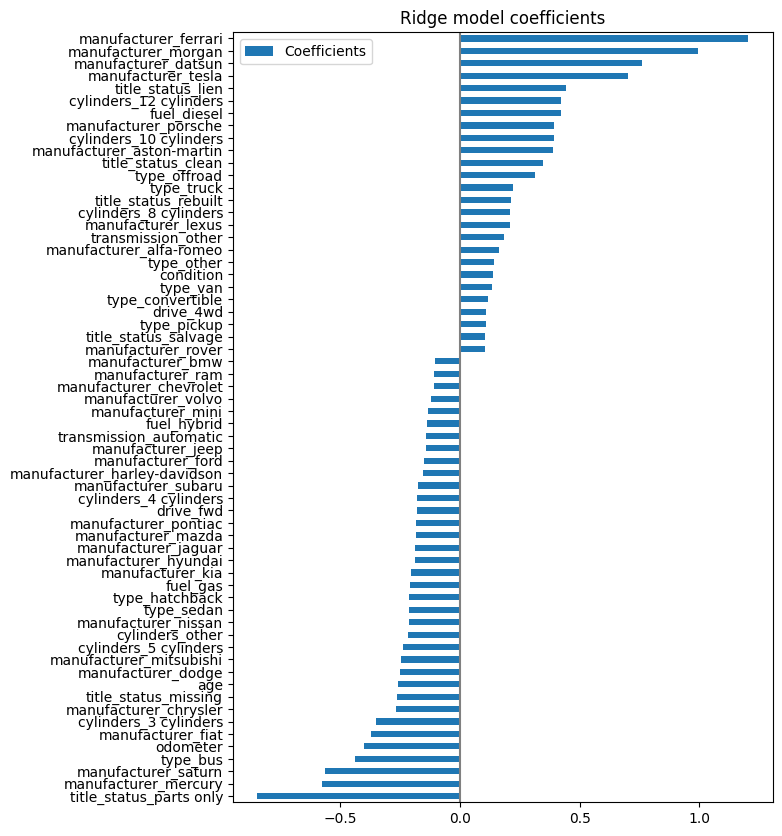

In [31]:
coefs = pd.DataFrame(
    gridcv.best_estimator_.regressor_.coef_,
    columns=["Coefficients"],
    index=X_train.columns,
)

#coefs.Coefficients.sort_values(key=abs, ascending=False).to_dict()

coefs[np.abs(coefs.Coefficients) > 0.1].sort_values(by="Coefficients").plot(
    kind="barh", figsize=(9, 10)
)
plt.title("Ridge model coefficients")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [32]:
from sklearn.inspection import permutation_importance

r = permutation_importance(
    gridcv,
    X_test,
    y_test,
    n_repeats=10,
    random_state=0,
    scoring="neg_root_mean_squared_error",
    n_jobs=4,
)

In [33]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(
            f"{gridcv.feature_names_in_[i]:<8}: "
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}"
        )

odometer: 3993.363 +/- 18.099
age     : 1705.709 +/- 18.531
fuel_diesel: 512.367 +/- 21.383
condition: 509.437 +/- 10.382
title_status_clean: 311.296 +/- 9.257
cylinders_8 cylinders: 294.041 +/- 13.927
type_truck: 254.808 +/- 11.863
type_sedan: 247.033 +/- 10.322
cylinders_4 cylinders: 244.440 +/- 12.583
drive_fwd: 232.139 +/- 11.550
manufacturer_ford: 182.688 +/- 8.545
drive_4wd: 132.522 +/- 6.929
transmission_other: 126.326 +/- 5.728
fuel_gas: 114.071 +/- 11.285
manufacturer_chevrolet: 112.205 +/- 4.319
manufacturer_dodge: 94.975 +/- 7.932
manufacturer_nissan: 83.916 +/- 5.148
title_status_lien: 80.386 +/- 6.476
transmission_automatic: 74.732 +/- 6.881
manufacturer_porsche: 58.625 +/- 4.552
manufacturer_ferrari: 54.185 +/- 11.457
cylinders_10 cylinders: 48.375 +/- 4.203
type_other: 47.613 +/- 3.841
type_hatchback: 47.297 +/- 5.503
manufacturer_ram: 46.063 +/- 3.186
manufacturer_lexus: 44.643 +/- 4.890
drive_rwd: 41.047 +/- 6.177
title_status_rebuilt: 35.959 +/- 5.275
manufacturer_chr

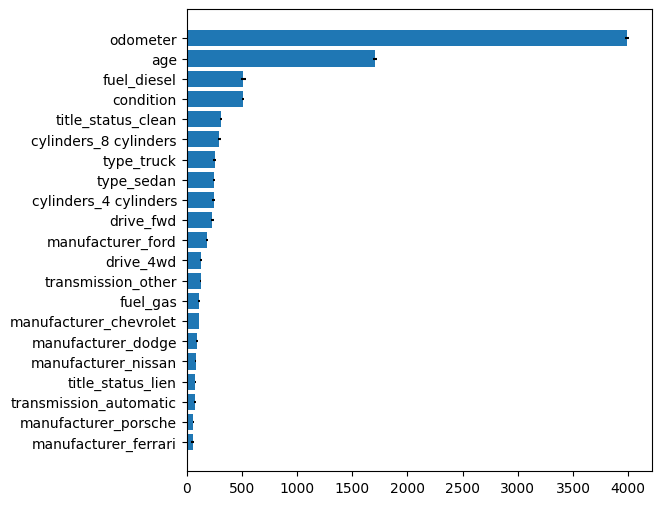

In [34]:
plt.figure(figsize=(6, 6))
indices = r["importances_mean"].argsort()
indices = indices[r["importances_mean"][indices] > 50]
plt.barh(
    range(len(indices)),
    r["importances_mean"][indices],
    xerr=r["importances_std"][indices],
)
plt.yticks(range(len(indices)), labels=X_train.columns[indices])
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

My analysis of this large dataset of used cars has revealed factors that significantly influence pricing, offering actionable guidance for inventory and sales strategies.

- **Mileage (odometer)**: The odometer reading is the most critical predictor, with higher mileage leading to lower prices. Each additional 1000 miles is associated with a $400 decrease in price.
- **Vehicle Type**: Trucks and offroad vehicles tend to have higher prices, while sedans and hatchbacks are associated with lower prices.
- **Vehicle Condition**: Cars in better condition command higher prices, with each increase in the condition level associated with around $10000 increase in the price.
- **Fuel Type**: Diesel cars generally command higher prices than gasoline cars.
- **Vehicle Age**: Older vehicles depreciate, leading to lower prices. Each additional year of age is associated with around $2400 decrease in the price.
- **Cylinders**: Vehicles with 8 or 12 cylinders tend to have higher prices, while those with 3, 4, or 5 cylinders are associated with lower prices.
- **Brands**:
  - *High-value brands*: Morgan, Ferrari, and Datsun vehicles significantly increase a car's predicted value. A Morgan vehicle is predicted to be much more expensive than the baseline model, all else being equal. This translates to a potential price increase of thousands of dollars.
  - *Low-value brands*: Saturn, Mercury, Fiat, Mitsubishi, Chrysler, Dodge, Kia, Land Rover, Nissan, and Mazda vehicles tend to decrease the predicted value compared to a baseline.
- **Title status impact**:
  - *Negative impact*: Cars with "parts only" or "missing" titles significantly reduce predicted value due to their limited usability and potential legal issues.
  - *Positive impact*: A "clean" title is the most desirable, increasing the predicted value due to the car's clear history and ownership. A "lien" title also increases the predicted value, potentially due to the car being associated with financing, which some buyers might prefer.